# GSE70630

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

## Preprocessing

In [2]:
gse70630 = pd.read_csv('clean_data/GSE70630.txt', sep='\t', index_col=0).T
gse70630_scaled = scale(gse70630)

## Principal Components Analysis

In [3]:
pca = PCA()
components = pca.fit_transform(gse70630_scaled)

In [4]:
exp_var = pca.explained_variance_ratio_
cum_exp_var = np.cumsum(exp_var)

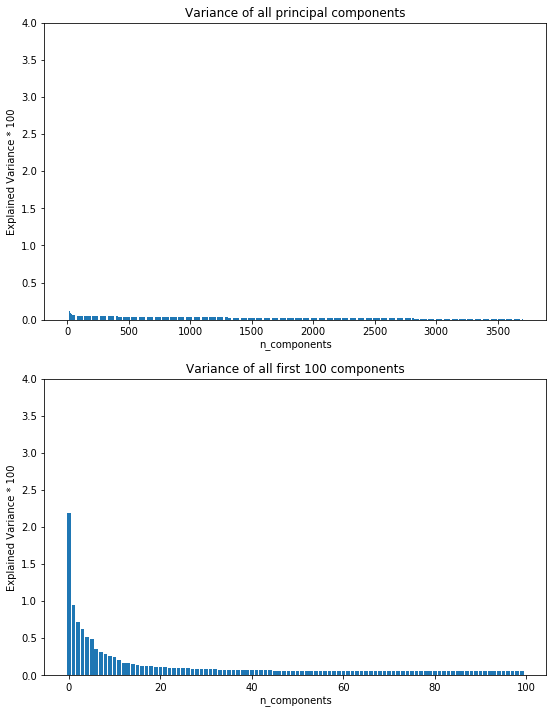

In [5]:

fig, ax = plt.subplots(2, 1, figsize=(9, 12))

x = np.arange(len(exp_var))
ax[0].bar(x, exp_var * 100, align='center')
ax[0].set_ylim(0, 4)
ax[0].set_xlabel('n_components')
ax[0].set_ylabel('Explained Variance * 100')
ax[0].set_title('Variance of all principal components')


first_n = 100
x_n = np.arange(first_n)
ax[1].bar(x_n, exp_var[:first_n] * 100, align='center')
ax[1].set_ylim(0, 4)
ax[1].set_xlabel('n_components')
ax[1].set_ylabel('Explained Variance * 100')
ax[1].set_title('Variance of all first {} components'.format(first_n));



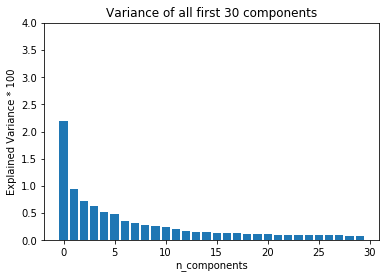

In [6]:
first_n = 30
x_n = np.arange(first_n)
plt.bar(x_n, exp_var[:first_n] * 100, align='center')
plt.ylim(0, 4)
plt.xlabel('n_components')
plt.ylabel('Explained Variance * 100')
plt.title('Variance of all first {} components'.format(first_n));

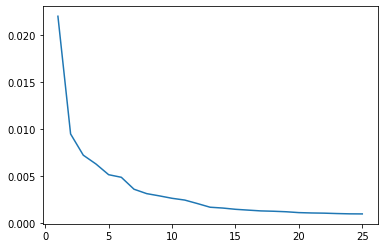

In [7]:
plt.plot(np.arange(25) + 1, exp_var[:25])

In [8]:
pca = PCA(n_components=15)
X = pca.fit_transform(gse70630_scaled)
print(X.shape)

(3711, 15)


## PCA 2-components

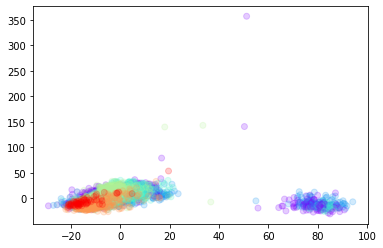

In [9]:
tumor_ids = gse70630.index.map(lambda s: s.split('_')[0])
tumors = pd.Series(tumor_ids.unique())
tumor_ids = tumor_ids.map(lambda s: tumors[tumors == s].index[0])
plt.scatter(X[:, 0], X[:, 1], c=tumor_ids, cmap='rainbow', alpha=0.2)

In [10]:
tumors

0    MGH36
1    MGH53
2    MGH54
3    MGH60
4    MGH97
5    MGH93
dtype: object

## t-SNE

Text(0.5, 1.0, 'tSNE dimensionality reduction')

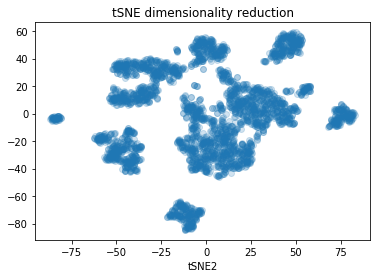

In [33]:
tsne = TSNE()
y_tsne = tsne.fit_transform(X)

plt.scatter(y_tsne[:, 0], y_tsne[:, 1], alpha=0.2)
plt.xlabel('tSNE1')
plt.xlabel('tSNE2')
plt.title('tSNE dimensionality reduction')

Text(0.5, 1.0, 'tSNE dimensionality reduction')

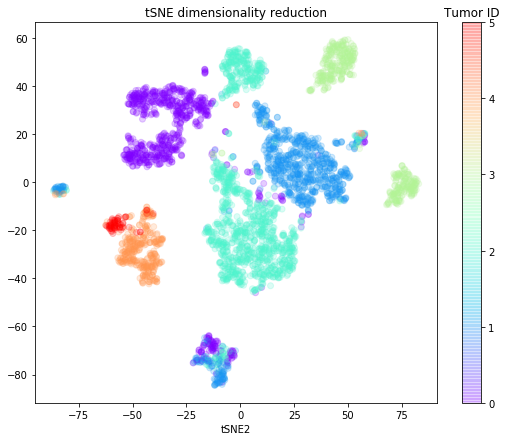

In [34]:
plt.figure(figsize=(9, 7))
plt.scatter(y_tsne[:, 0], y_tsne[:, 1], alpha=0.2, c=tumor_ids, cmap='rainbow')
clb = plt.colorbar()
clb.ax.set_title('Tumor ID')
plt.xlabel('tSNE1')
plt.xlabel('tSNE2')
plt.title('tSNE dimensionality reduction')

In [38]:
from rna_autoencoder import plot_dimensionality_reduction

t_cells = list(pd.read_csv('t-cells.csv').values.flatten())
columns_filter = data.columns.map(lambda gene: gene in t_cells)
data_t = data.loc[:, columns_filter]
t_counts = (data_t > 0).sum(1)
df = pd.DataFrame(np.c_[t_counts, y_tsne, data.index], columns=['tumor_ids', 'z1', 'z2', 'cell'])
plot_dimensionality_reduction(df, x='z1', y='z2', title='t-cells expression')

Loading BokehJS ...

In [14]:
import umap

reducer = umap.UMAP()
embedding = reducer.fit_transform(X)

/home/alumnos/secancino/anaconda3/envs/sc-rna-seq/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


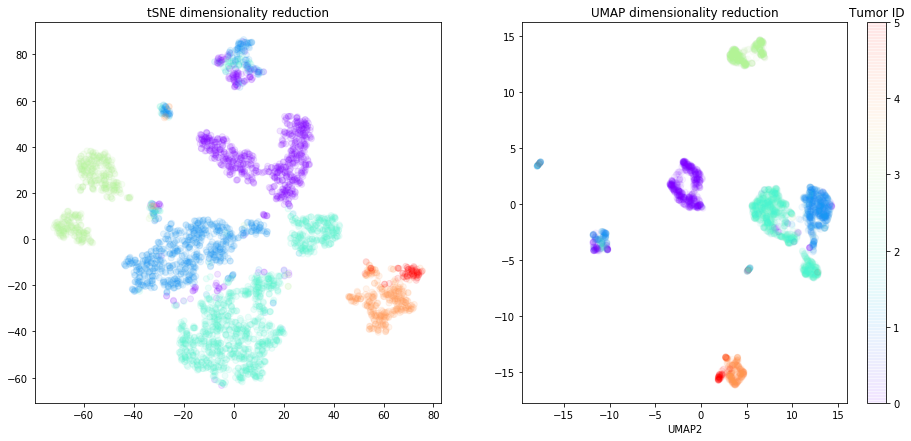

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(16, 7))

im = ax[0].scatter(y_tsne[:, 0], y_tsne[:, 1], alpha=0.1, c=tumor_ids, cmap='rainbow')
ax[0].set_title('tSNE-1')
ax[0].set_title('tSNE-2')
ax[0].set_title('tSNE dimensionality reduction')

im = ax[1].scatter(embedding[:, 0], embedding[:, 1], alpha=0.05, c=tumor_ids, cmap='rainbow')
ax[1].set_xlabel('UMAP1')
ax[1].set_xlabel('UMAP2')
ax[1].set_title('UMAP dimensionality reduction')

cb = fig.colorbar(im)
cb.ax.set_title('Tumor ID');

## Autoencoder

In [20]:
from rna_autoencoder_test import AutoEncoder, plot_dimensionality_reduction

In [22]:
model, data = AutoEncoder.load_model('models/GSE70630-20200120-145916', load_data=True)

GSE70630-20200120-145916


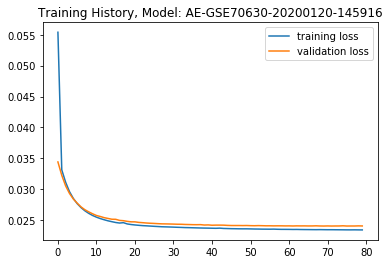

In [27]:
model.plot_history()

### tSNE

In [28]:
reduced = model.reduce(data.values, method='tSNE')
df = pd.DataFrame(np.c_[tumor_ids, reduced, data.index], columns=['tumor_ids', 'z1', 'z2', 'cell'])
plot_dimensionality_reduction(df, x='z1', y='z2', title='Dimensionality Reduction: AutoEncoder + tSNE')

Loading BokehJS ...

### UMAP

In [30]:
reduced = model.reduce(data.values, method='UMAP')
df = pd.DataFrame(np.c_[tumor_ids, reduced, data.index], columns=['tumor_ids', 'z1', 'z2', 'cell'])
plot_dimensionality_reduction(df, x='z1', y='z2', title='Dimensionality Reduction: AutoEncoder + UMAP')

/home/alumnos/secancino/anaconda3/envs/sc-rna-seq/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


Loading BokehJS ...

In [25]:
model.plot_clusters(data.values, method='tSNE', cell_names=data.index)

2 clusters: 0.38316893577575684
3 clusters: 0.40283533930778503
4 clusters: 0.4731997847557068
5 clusters: 0.482295423746109
6 clusters: 0.4769527316093445
7 clusters: 0.4757951498031616
8 clusters: 0.4883478283882141
Optimal Clusters: 8


Loading BokehJS ...

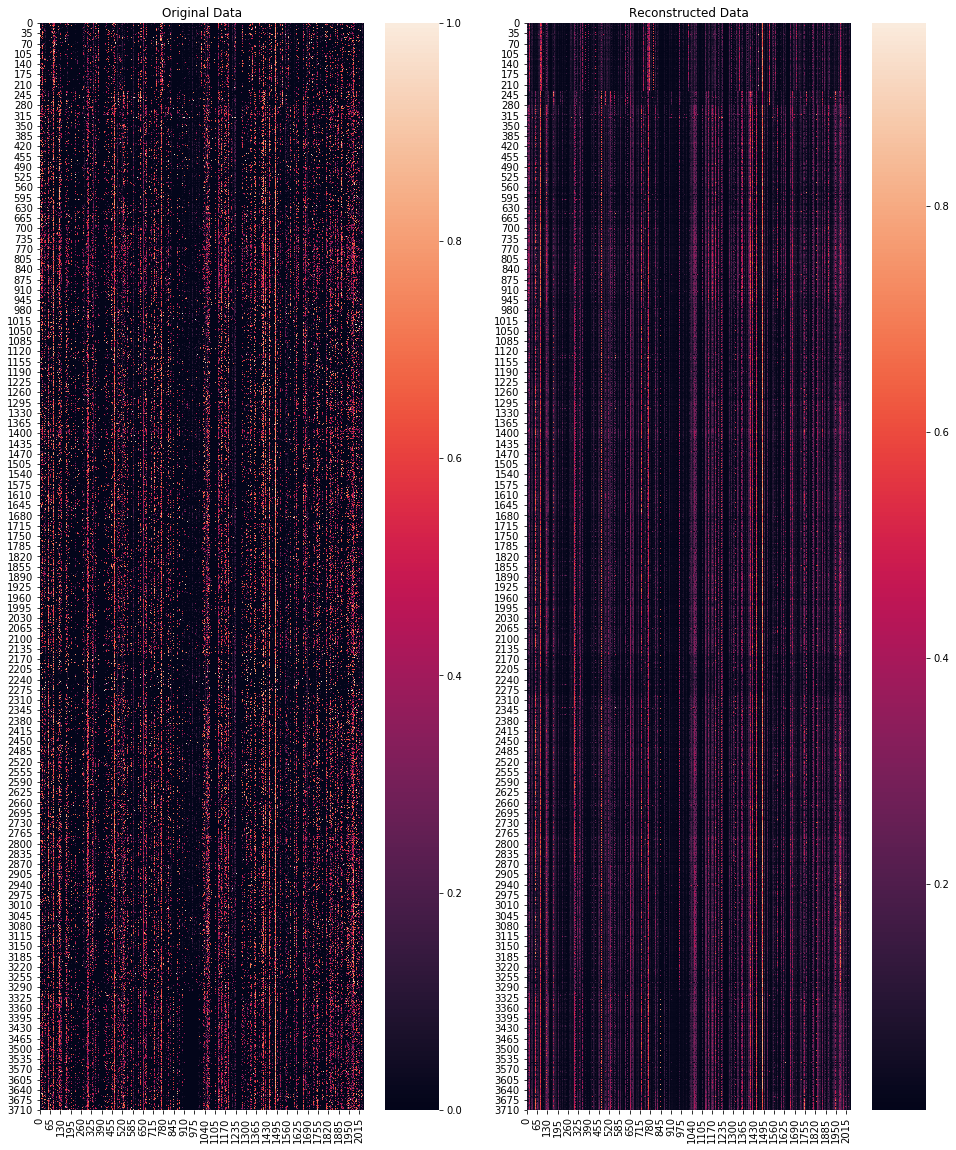

In [26]:
model.plot_reconstructions(data.values, figsize=(16, 20));

In [32]:
reduced = model.reduce(data.values, method='UMAP')
cd4 = (gse70630['CD4'] > 0).astype(int)
df = pd.DataFrame(np.c_[cd4, reduced, data.index], columns=['tumor_ids', 'z1', 'z2', 'cell'])
plot_dimensionality_reduction(df, x='z1', y='z2', title='Dimensionality Reduction: AutoEncoder + UMAP')

/home/alumnos/secancino/anaconda3/envs/sc-rna-seq/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


Loading BokehJS ...

In [42]:
gse57872 = pd.read_csv('clean_data/GSE57872.txt', sep='\t', index_col=0)
gse57872.head()

,MGH264_A01,MGH264_A02,MGH264_A03,MGH264_A04,MGH264_A05,MGH264_A06,MGH264_A07,MGH264_A08,MGH264_A10,MGH264_A11,...,MGH31_H02,MGH31_H04,MGH31_H05,MGH31_H06,MGH31_H07,MGH31_H08,MGH31_H09,MGH31_H10,MGH31_H11,MGH31_H12
A2M,-3.801470,-3.801470,-3.801470,-3.801470,-3.801470,-1.987700,-3.801470,-3.801470,-3.801470,-3.801470,...,-1.297972,7.171407,-3.801470,-3.801470,-1.102296,0.049047,-3.801470,-0.264648,-3.801470,-3.801470
AAAS,-3.889900,-3.889900,-3.889900,-3.889900,3.742495,-3.889900,-3.889900,-3.889900,-3.889900,4.316243,...,-3.889900,-3.889900,-3.889900,-3.889900,4.405524,3.802559,-3.889900,-3.889900,3.616363,-1.258929
AAK1,-3.985616,-3.158708,1.733125,-1.665669,-2.166992,4.691156,2.656469,-1.914759,0.483560,1.828663,...,-0.608787,0.255614,4.876503,3.098786,2.664671,0.569558,3.696882,-1.092769,2.991430,2.012230
AAMP,2.651558,2.358992,-5.820241,3.514271,-5.820241,-4.006471,2.207608,2.417820,-5.820241,2.140173,...,3.348386,1.450563,3.080595,2.273674,1.854226,2.277677,2.838116,-1.215363,1.747092,1.652332
AARS,2.170748,-6.041792,-6.041792,-6.041792,2.094729,-3.449348,-6.041792,3.162904,-6.041792,-6.041792,...,1.000156,2.679441,-6.041792,3.633562,1.593344,-3.588918,-0.613635,-6.041792,3.499675,3.667814


## UMAP on raw dataset

In [52]:
from umap import UMAP
n_genes, n_cells = gse57872.shape
expr = gse57872.T
y_tsne = UMAP().fit_transform(expr)

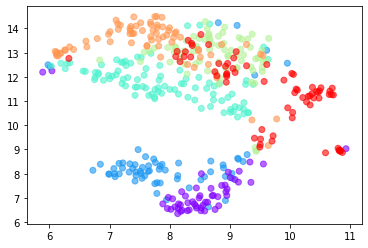

In [53]:
from sklearn.preprocessing import LabelEncoder
tumor_ids = LabelEncoder().fit_transform(expr.index.map(lambda i: i.split('_')[0]))
plt.scatter(y_tsne[:, 0], y_tsne[:, 1], c=tumor_ids, alpha=0.6, cmap='rainbow')